# FOXSI Optics Analysis CCD 
## December 2017 - Berkeley
## @Milo

### Packages

In [16]:
%matplotlib inline
from foxsi_optics_calib.ccd.ccd import AndorCCDImage, AndorCCDPsfImage, AndorCCDPsfFitImage
import astropy.units as u
import matplotlib.pyplot as plt

### Files:

In [5]:
psf_file = '../data_example/FOXSI3_X2_25mmz_CCD_10kV_0p02mA_0arcminX_0arcminY_run1.fits'
dark_file = '../data_example/FOXSI3_X2_10kV_0p02mA_darkframe2.fits'
focal_length = 2 * u.m

Found 10 exposures. Averaging...
Found 10 exposures. Averaging...


(<matplotlib.axes._subplots.WCSAxesSubplot at 0x10ac72710>,
 <matplotlib.contour.QuadContourSet at 0x182ae02be0>)

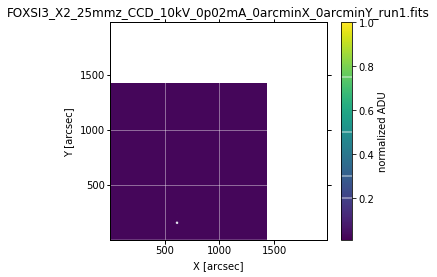

In [17]:
psf = AndorCCDImage(psf_file,focal_length)
dark = AndorCCDImage(dark_file,focal_length)
data = (psf.data - dark.data)/dark.data
psf.plot_image(vmin=1e-2,colorbar=True)

In [10]:
psf.data

array([[ 1322.19995117,  1322.90002441,  1325.09997559, ...,
         1322.90002441,  1328.        ,  1325.40002441],
       [ 1323.40002441,  1319.5       ,  1322.        , ...,
         1321.90002441,  1323.90002441,  1328.09997559],
       [ 1324.09997559,  1317.90002441,  1327.30004883, ...,
         1323.90002441,  1325.        ,  1322.        ],
       ..., 
       [ 1333.59997559,  1332.19995117,  1331.90002441, ...,
         1329.90002441,  1327.90002441,  1329.80004883],
       [ 1333.40002441,  1331.90002441,  1334.69995117, ...,
         1329.5       ,  1331.09997559,  1328.30004883],
       [ 1335.        ,  1336.40002441,  1336.30004883, ...,
         1330.30004883,  1332.59997559,  1332.5       ]], dtype=float32)

Calling the **AndorCCDImage** Class:

In [3]:
img = AndorCCDImage(psf_file, focal_length)
psf_img = AndorCCDPsfImage(psf_file, focal_length)
psffit_img = AndorCCDPsfFitImage(psf_file, focal_length)

Found 10 exposures. Averaging...
Found 10 exposures. Averaging...
Found 10 exposures. Averaging...
{'amplitude1': 6800.5243629724418, 'amplitude2': 2490.0720387785591, 'amplitude3': 970.49253803084628, 'x_stddev1': 1.3239919894745515, 'y_stddev1': 1.4488202880882064, 'x_stddev2': 4.2170559522149125, 'y_stddev2': 4.125216553833738, 'x_stddev3': 9.2014587145146169, 'y_stddev3': 9.4812661651152972, 'theta': 90.0}


/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/astropy/modeling/functional_models.py:456: RuntimeWarning: divide by zero encountered in true_divide
  a = 0.5 * ((cost2 / xstd2) + (sint2 / ystd2))
/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/astropy/modeling/functional_models.py:457: RuntimeWarning: divide by zero encountered in true_divide
  b = 0.5 * ((sin2t / xstd2) - (sin2t / ystd2))
/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/astropy/modeling/functional_models.py:458: RuntimeWarning: divide by zero encountered in true_divide
  c = 0.5 * ((sint2 / xstd2) + (cost2 / ystd2))
/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/astropy/modeling/functional_models.py:459: RuntimeWarning: invalid value encountered in add
  return amplitude * np.exp(-((a * xdiff ** 2) + (b * xdiff * ydiff) +
/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/astropy/modeling/functional_models.py:457: RuntimeWarning: invalid value encountered in subtract
  b = 0.5 * ((sin2t / x

Number of calls to function has reached maxfev = 200.
amplitude: 47901.857376978645 3614.800484742164 2234.439633738776
center: -355.01669752231476, -121.04790741526149


The problem with this is that the functions are reading the data directly with substracting the dark frames. I need to substract the darks before processing the PSF.

In [6]:
psf = PsfImage(psf_file)
dark = PsfImage(dark_file)
data = (psf.data - dark.data)/dark.data
psf.plot_image(vmin=1e-2,colorbar=True)

NameError: name 'PsfImage' is not defined